**ExtraaLearn Project**

**Context**

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like



* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure

*  The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

**Objective**

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:


*   Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,

*   Find the factors driving the lead conversion process
*  Create a profile of the leads which are likely to convert






**Data Description**

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

**Data Dictionary**

* ID: ID of the lead  

* age: Age of the lead  

*   current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

*  first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
*   profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
*  website_visits: How many times has a lead visited the website
*  time_spent_on_website: Total time spent on the website

*  page_views_per_visit: Average number of pages on the website viewed during the visits.

*  last_activity: Last interaction between the lead and ExtraaLearn.
  *  Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
  *   Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
  *  Website Activity: Interacted on live chat with representative, Updated profile on website, etc
*   print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.












*  print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.




*   digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.


*   educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.




*   referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.


*   status: Flag indicating whether the lead was converted to a paid customer or not.





**Importing necessary libraries and data**

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Overview**

In [ ]:
# Read dataset file
df = pd.read_csv('/content/drive/MyDrive/Python Course/ExtraaLearn.csv')

In [ ]:
# Copying data to another variable to avoid any changes to original data
df_copy = df.copy()

In [ ]:
df_copy.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
df_copy.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [ ]:
df_copy.shape

(4612, 15)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df_copy.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [ ]:
df_copy.duplicated().sum()

0

**Observation:**
The dataset has 4612 rows and 15 columns with no duplicated values.we have 5 numeric variables and 10 catagorical variables. there are no null values in the data.This structure indicates that the dataset is well-prepared for analysis, allowing us to focus on understanding patterns and trends without the need for significant data cleaning

In [ ]:
df_copy.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


In [ ]:
# Dropping the ID columns since each value is unique
df_copy.drop(columns=['ID'], inplace=True)

In [ ]:
df_copy.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


**Observation:**
The ID column contains entirely unique values and serves no analytical purpose, so it can be safely dropped from further analysis.Age, Website Visits, Time Spent on Website, and Page Views per Visit each has larger unique values.In contrast, the remaining columns exhibit lower levels of uniqueness and are largely categorical in nature.


**Exploratory Data Analysis (EDA)**



*  EDA is an important part of any project involving data.
*  It is important to investigate and understand the data better before building a model with it.


*  A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
*  A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**


1.  Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

2.   The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3.   The company uses multiple modes to interact with prospects. Which way of interaction works best?


4.   The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?


5.  People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?























## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Let's view the statistical summary of the columns in the dataset
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**

The dataset shows that the average age of prospects is around 46 years, with most falling between 36 and 57 years old. Website activity is varied, with an average of 3.57 visits per prospect and significant variation in both visits and time spent, where a small group of users engaged much more frequently and for longer durations (up to 2,537 seconds). On average, prospects view about 3 pages per visit, with noticeable variability in page views. The high standard deviations in website behavior suggest that while most users engage moderately, a subset exhibits much more intensive interaction, potentially indicating higher interest.

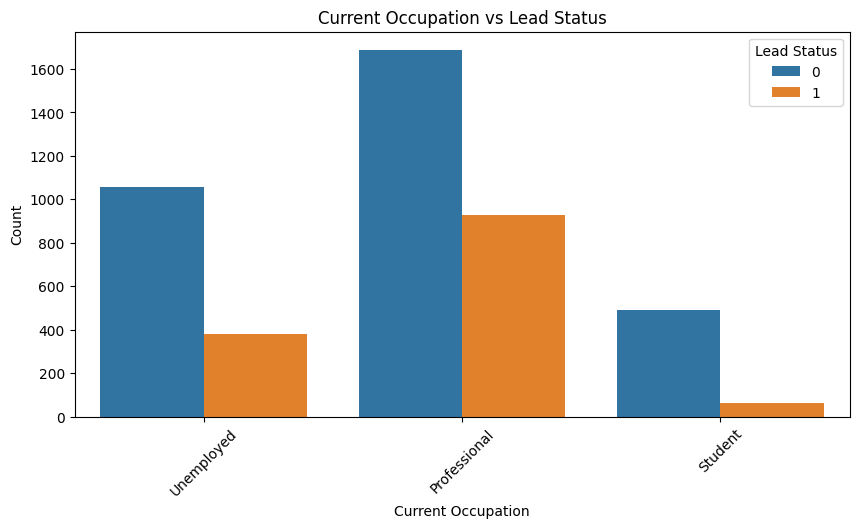

In [ ]:
#1 how  how current occupation affects lead status
plt.figure(figsize=(10, 5))
sns.countplot(data=df_copy, x='current_occupation', hue='status')
plt.xticks(rotation=45)
plt.title('Current Occupation vs Lead Status')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Lead Status', loc='upper right')
plt.show()

**Observations:**

The graph reveals that the majority of leads come from working professionals, while students account for a significantly smaller proportion of leads with lower lead status or conversion rates.

<Figure size 1000x600 with 0 Axes>

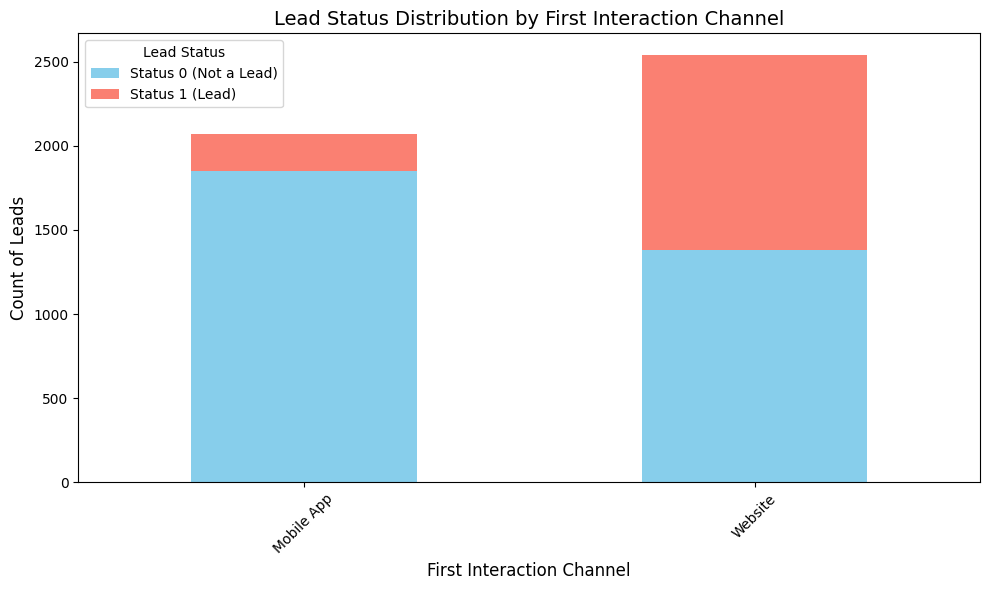

In [ ]:
#2 to check if the first channels of interaction have an impact on the lead status?
interaction_status = df.groupby(['first_interaction', 'status']).size().unstack()
# Plotting the distribution of lead status by first interaction channel
plt.figure(figsize=(10,6))
interaction_status.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))
plt.title('Lead Status Distribution by First Interaction Channel', fontsize=14)
plt.xlabel('First Interaction Channel', fontsize=12)
plt.ylabel('Count of Leads', fontsize=12)
plt.legend(['Status 0 (Not a Lead)', 'Status 1 (Lead)'], title="Lead Status")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Observations:**
The bar chart above shows the distribution of lead statuses (0 = Not a Lead, 1 = Lead) across different first interaction channels. "Website", "Mobile App" have more successful lead outcomes compared to others.

<Figure size 1000x600 with 0 Axes>

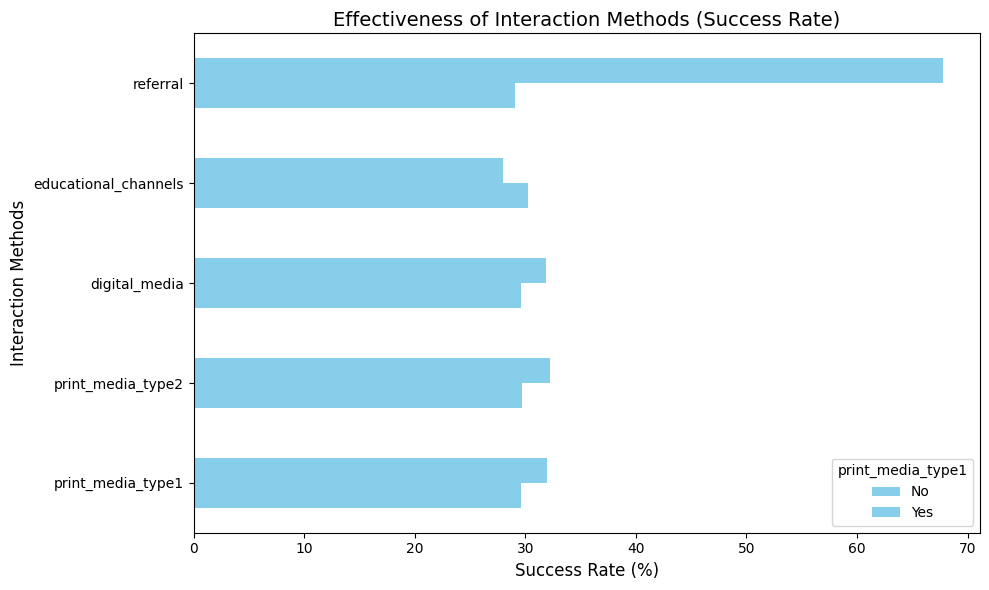

print_media_type1          No      Yes
print_media_type1    29.59903 31.99195
print_media_type2    29.73282 32.18884
digital_media        29.59608 31.87856
educational_channels 30.20220 27.94326
referral             29.07723 67.74194


In [ ]:
#3 To determine which mode of interaction works best for the company
# Define the interaction columns
interaction_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Calculate the percentage of successful leads (status = 1) for each interaction method
interaction_effectiveness = pd.DataFrame()

for col in interaction_columns:
    interaction_success = df.groupby(col)['status'].mean() * 100  # percentage of successful leads
    interaction_effectiveness[col] = interaction_success

# Transpose for better visualization
interaction_effectiveness = interaction_effectiveness.T
# Plotting the effectiveness of each interaction mode
plt.figure(figsize=(10,6))
interaction_effectiveness.plot(kind='barh', color='skyblue', figsize=(10,6))
plt.title('Effectiveness of Interaction Methods (Success Rate)', fontsize=14)
plt.xlabel('Success Rate (%)', fontsize=12)
plt.ylabel('Interaction Methods', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()
# Print the interaction effectiveness data
print(interaction_effectiveness)

**Observations:**
The graph reveals the effectivness of interaction method sucsess rate. from this analysis referral seems to be the best way of interaction for converting prospects into leads.

<Figure size 1000x600 with 0 Axes>

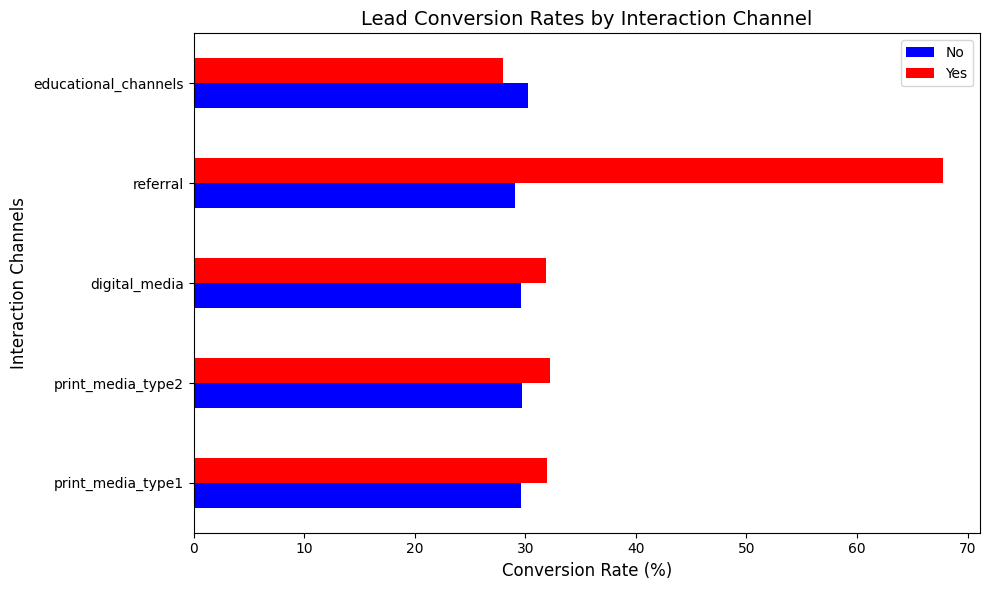

,No,Yes
print_media_type1,29.59903,31.99195
print_media_type2,29.73282,32.18884
digital_media,29.59608,31.87856
referral,29.07723,67.74194
educational_channels,30.20220,27.94326


In [ ]:
#4 Which of these channels have the highest lead conversion rate?
# Calculate lead conversion rate for each channel
channel_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'referral', 'educational_channels']

# Store conversion rates in a dictionary for clarity
conversion_rates = {}

for channel in channel_columns:
    # Calculate conversion rate for each channel ('Yes' vs 'No')
    conversion_rate = df.groupby(channel)['status'].mean() * 100  # percentage of successful leads
    conversion_rates[channel] = conversion_rate

# Convert the dictionary to a DataFrame for easier visualization
conversion_rate_df = pd.DataFrame(conversion_rates).T
conversion_rate_df.columns = ['No', 'Yes']

# Plotting the conversion rates
plt.figure(figsize=(10,6))
conversion_rate_df.plot(kind='barh', color=['blue', 'red'], figsize=(10,6))
plt.title('Lead Conversion Rates by Interaction Channel', fontsize=14)
plt.xlabel('Conversion Rate (%)', fontsize=12)
plt.ylabel('Interaction Channels', fontsize=12)
plt.tight_layout()

plt.show()

conversion_rate_df




**Observations:**
The analysis shows that educational channeles shows lower conversion rate while referral have the higher conversion rate.

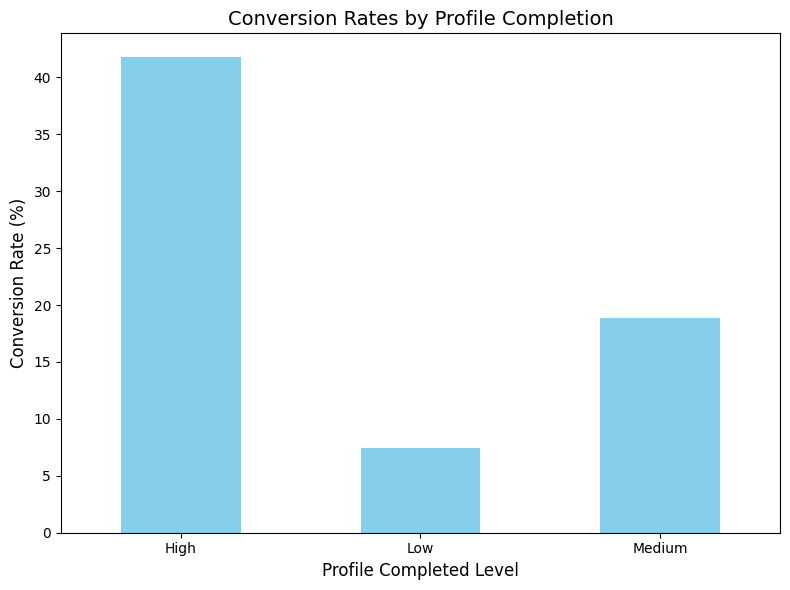

profile_completed
High     41.78445
Low       7.47664
Medium   18.87550
Name: status, dtype: float64


In [ ]:
#5 # Does having more details about a prospect increase the chances of conversion?
conversion_rate_by_profile = df.groupby('profile_completed')['status'].mean() * 100  # percentage of successful leads

# Plotting the conversion rates by profile completeness
plt.figure(figsize=(8,6))
conversion_rate_by_profile.plot(kind='bar', color='skyblue')
plt.title('Conversion Rates by Profile Completion', fontsize=14)
plt.xlabel('Profile Completed Level', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Print conversion rates for each level of profile completion
print(conversion_rate_by_profile)

**Observations:**
Customers with highly completed profiles have a conversion rate of 41.78%, which is significantly higher than the other categories. while customers with low profile completion have a very low conversion rate of 7.48%. This suggests that prospects who provide minimal information are much less likely to convert.

In [ ]:
# Making a list of all catrgorical variables
cat_cols = [col for col in df_copy.columns if df_copy[col].dtype == 'object']
for col in cat_cols:
  print(col)
  print(df_copy[col].value_counts(1))
  print('='*50)

current_occupation
current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
first_interaction
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
profile_completed
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
last_activity
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
print_media_type1
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
print_media_type2
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
digital_media
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
educational_channels
educational_channels
No    0.84714
Yes   0.15286
Name: proportion, dtype: float64
referral
referral
No    0.97984
Yes   0.02016
Name: proportion, dtype: float64


**Individual Column Data Analysis using Boxplot and histogram**

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

age
Skewness: -0.720022


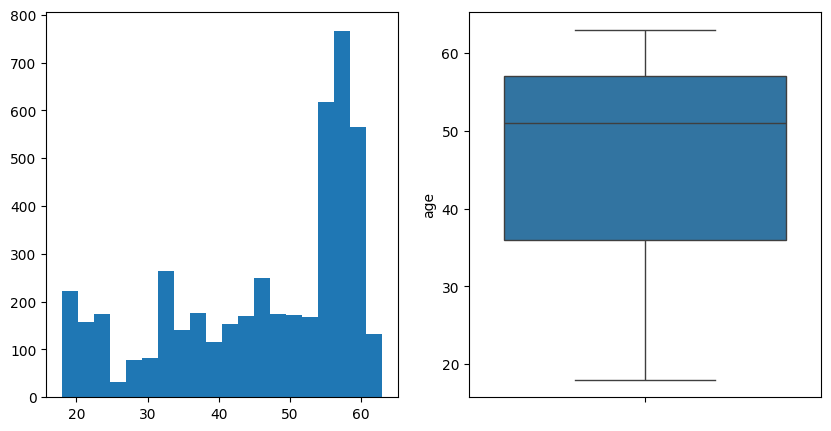

website_visits
Skewness: 2.156165


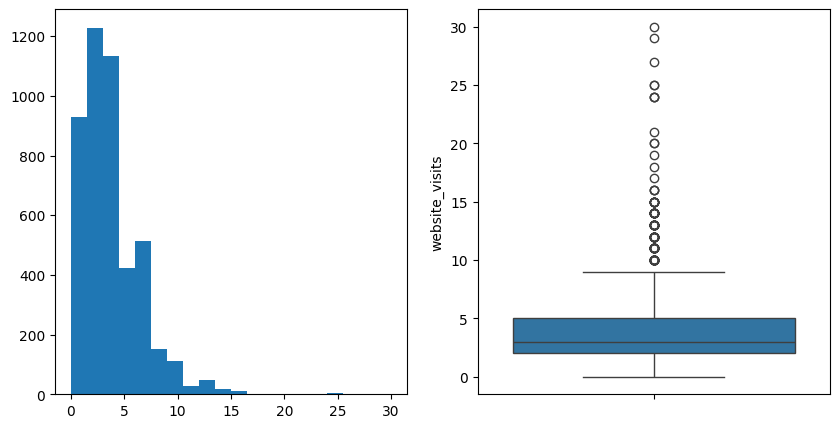

time_spent_on_website
Skewness: 0.952928


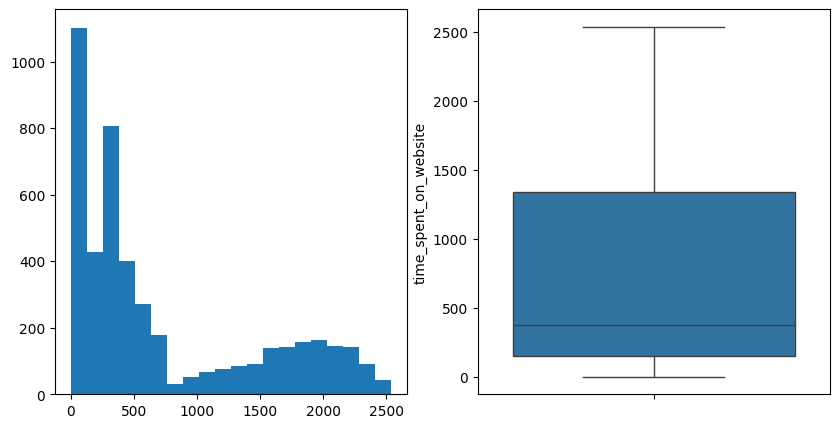

page_views_per_visit
Skewness: 1.265004


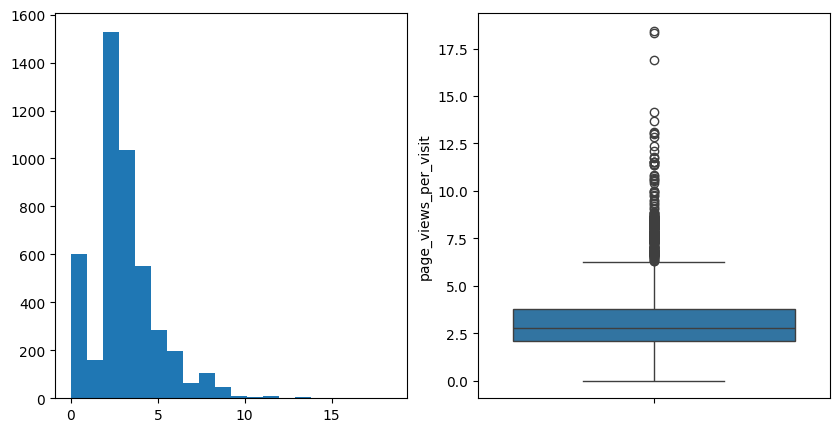

In [ ]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
  print(col)
  print('Skewness: %f' % df_copy[col].skew())
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  df_copy[col].hist(bins=20, grid = False)
  plt.subplot(1, 2, 2)
  sns.boxplot(df_copy[col])
  plt.show()


**Observations:**


*  The age distribution is left-skewed, indicating that the majority of leads are between 55 and 65 years old.

*  Website visits are right-skewed, with most leads visiting the site 0 to 7 times, though there are some outliers, with certain leads visiting the website 10 to 30 times.
* Time spent on the website is also right-skewed, showing that most leads spent less than 700 seconds (~12 minutes) browsing.


*   The distribution of page views per visit is approximately normal, with most leads viewing 2.5 to 3.5 pages. However, several outliers viewed between 7.5 and more than 17.5 pages per visit.



In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

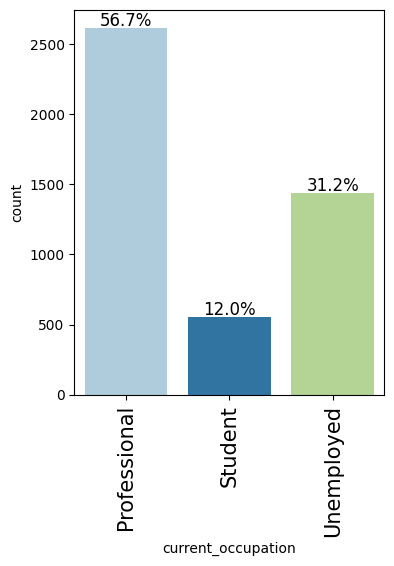

In [ ]:
#Observations on current_occupation
labeled_barplot(data=df_copy, feature='current_occupation', perc=True)

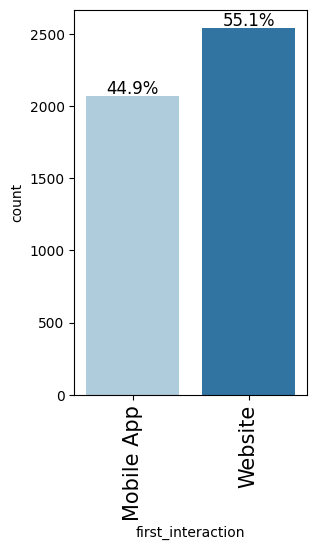

In [ ]:
# Observations on number of first_interaction
labeled_barplot(data=df_copy, feature='first_interaction', perc=True)

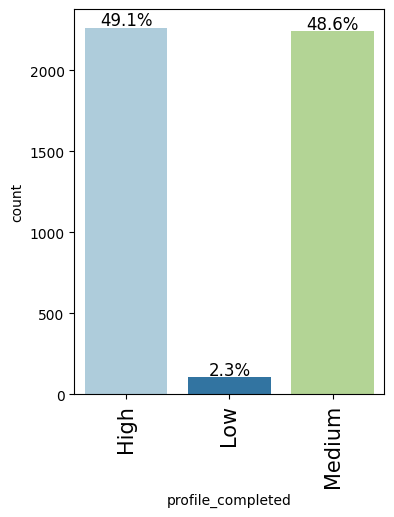

In [ ]:
# Observations on profile_completed
labeled_barplot(data=df_copy, feature='profile_completed', perc=True)

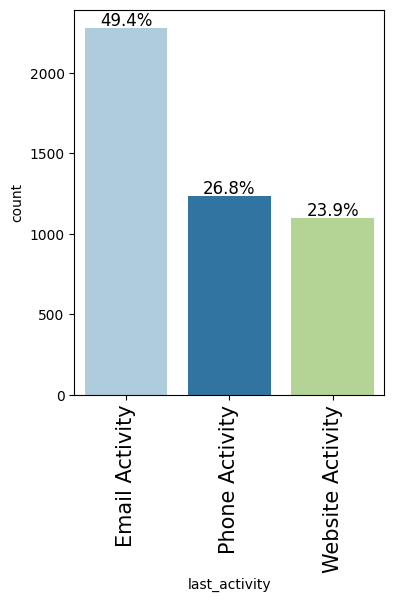

In [ ]:
# Observations on last_activity
labeled_barplot(data=df_copy, feature='last_activity', perc=True)

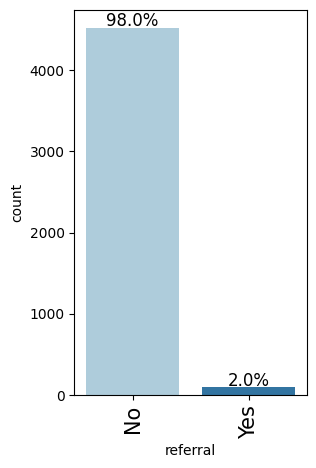

In [ ]:
#observation on referral
labeled_barplot(data=df_copy, feature='referral', perc=True)

**Observations:**


*   Current Occupation: Most leads are professionals (56.72%),
followed by the unemployed (31.25%) and a smaller proportion of students (12.03%).


*  First Interaction: The majority of leads come from the Website (55.12%), while Mobile App accounts for 44.88%.

*   Profile Completion: Nearly half of the profiles are highly completed (49.09%), with medium completion close behind (48.59%), and very few profiles are low completion (2.32%).

*   Last Activity: Email activity is the most common last interaction (49.39%), followed by phone activity (26.76%) and website activity (23.85%).

* Print Media Type 1: Most prospects (89.22%) have not interacted with print media type 1.
*   Print Media Type 2: A similar trend is observed for print media type 2, with 94.95% not interacting with this media.


*   Digital Media: 88.57% of leads have not engaged with digital media, while 11.43% have.


*   Educational Channels: 84.71% of leads have not interacted with educational channels, while 15.29% have.


*   Referral: Referrals are rare, with only 2.02% of leads coming through referrals, while the vast majority (97.98%) are not referral-based.























These observations suggest that professionals, website interactions, and email activity dominate the lead generation process, while referrals and print media channels play a minimal role.











# Bivariate Analysis

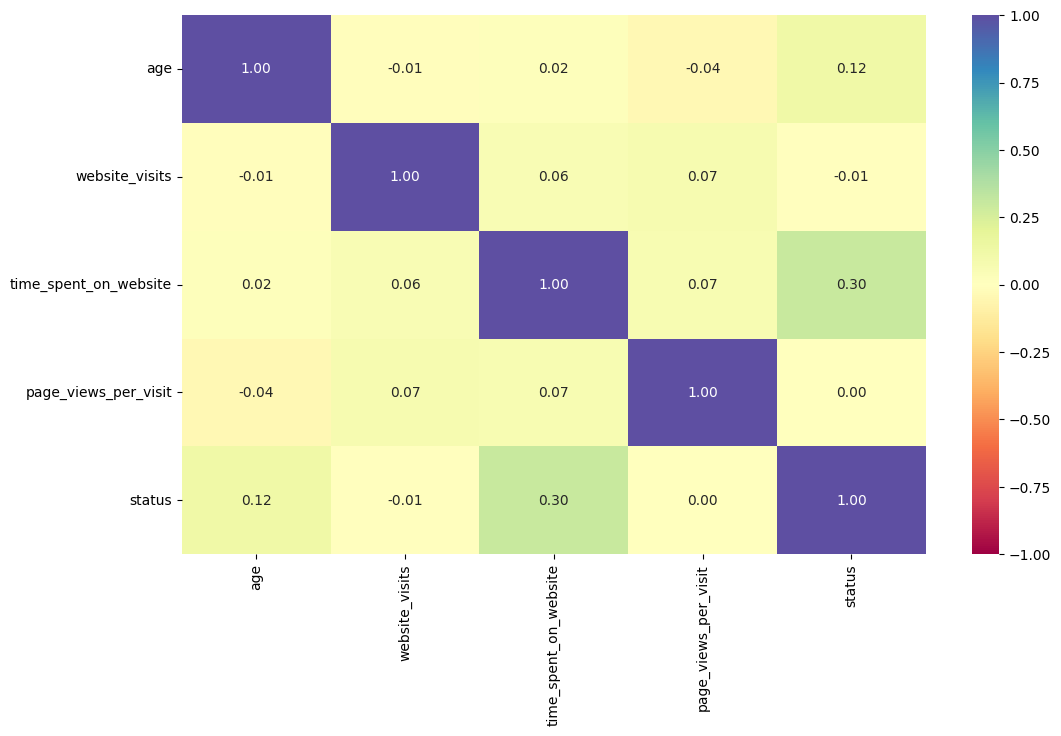

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_copy[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**




*   There is a moderate positive correlation (0.30) between time spent on the website and lead conversion status. This suggests that spending more time on the website increases the chances of converting into a lead.

*   A weaker but positive correlation (0.12) exists between age and lead status, indicating that older individuals might be slightly more likely to convert.
*   Other variables like website visits and page views per visit show weaker or negligible correlations with lead status, indicating they may not be as predictive of lead conversion.







In [ ]:
#creating functions for further analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
----------------------------------------------------------------------------------------------------


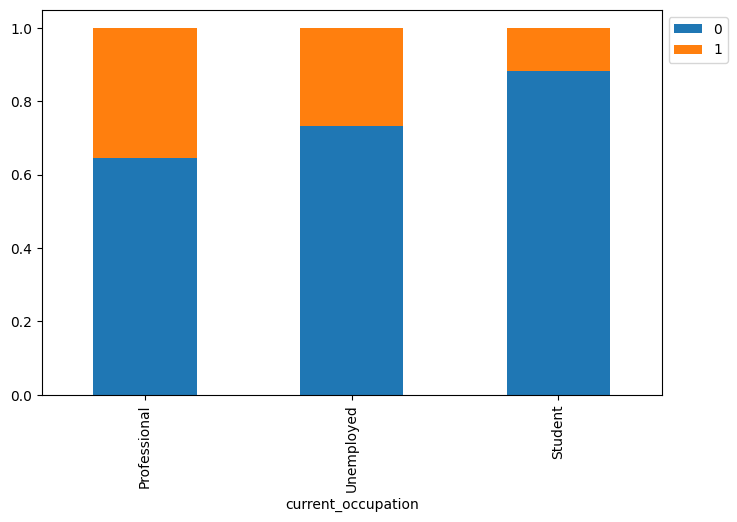

In [ ]:
#current occupation vs status
stacked_barplot(data=df_copy, predictor='current_occupation', target='status')

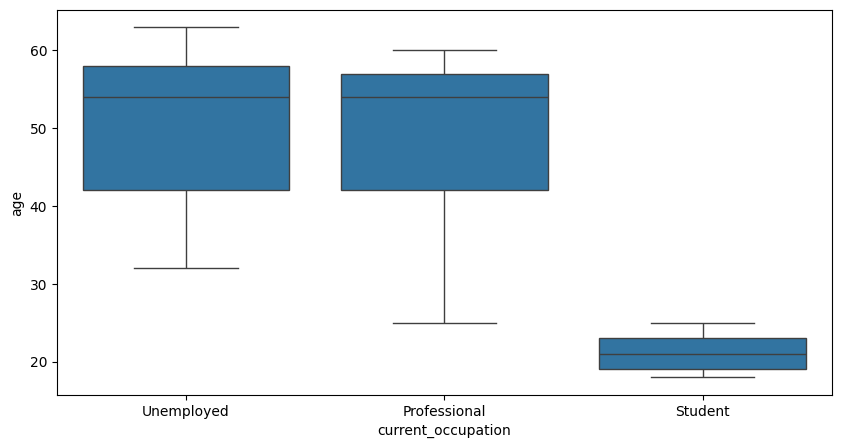

In [ ]:
#current occupation vs age
plt.figure(figsize=(10, 5))
sns.boxplot(x='current_occupation', y='age', data=df_copy)
plt.show()



In [ ]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


## Data Preprocessing

### Outlier Check

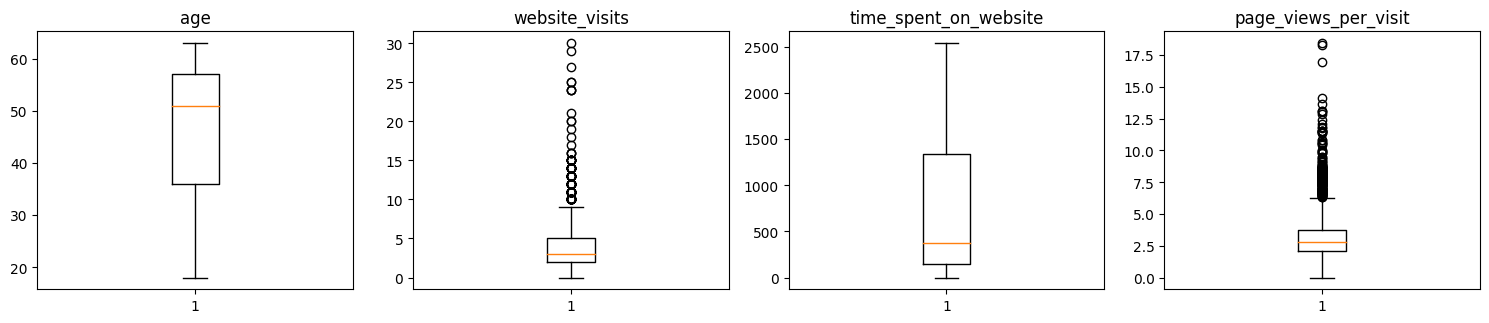

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_copy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Preparing data for modeling ***

In [ ]:
from re import X
#Preparing data for modeling
X=df_copy.drop(columns=['status'])
Y=df_copy['status']
X=pd.get_dummies(x)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 25)
Shape of test set :  (1384, 25)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## Building a Decision Tree model

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#check the performance on the training data
y_pred_train1 = d_tree.predict(X_train)
print(classification_report(y_train, y_pred_train1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [ ]:
#check the performance on the test data
y_pred_test1 = d_tree.predict(X_test)
print(classification_report(y_test, y_pred_test1))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85       962
           1       0.67      0.67      0.67       422

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



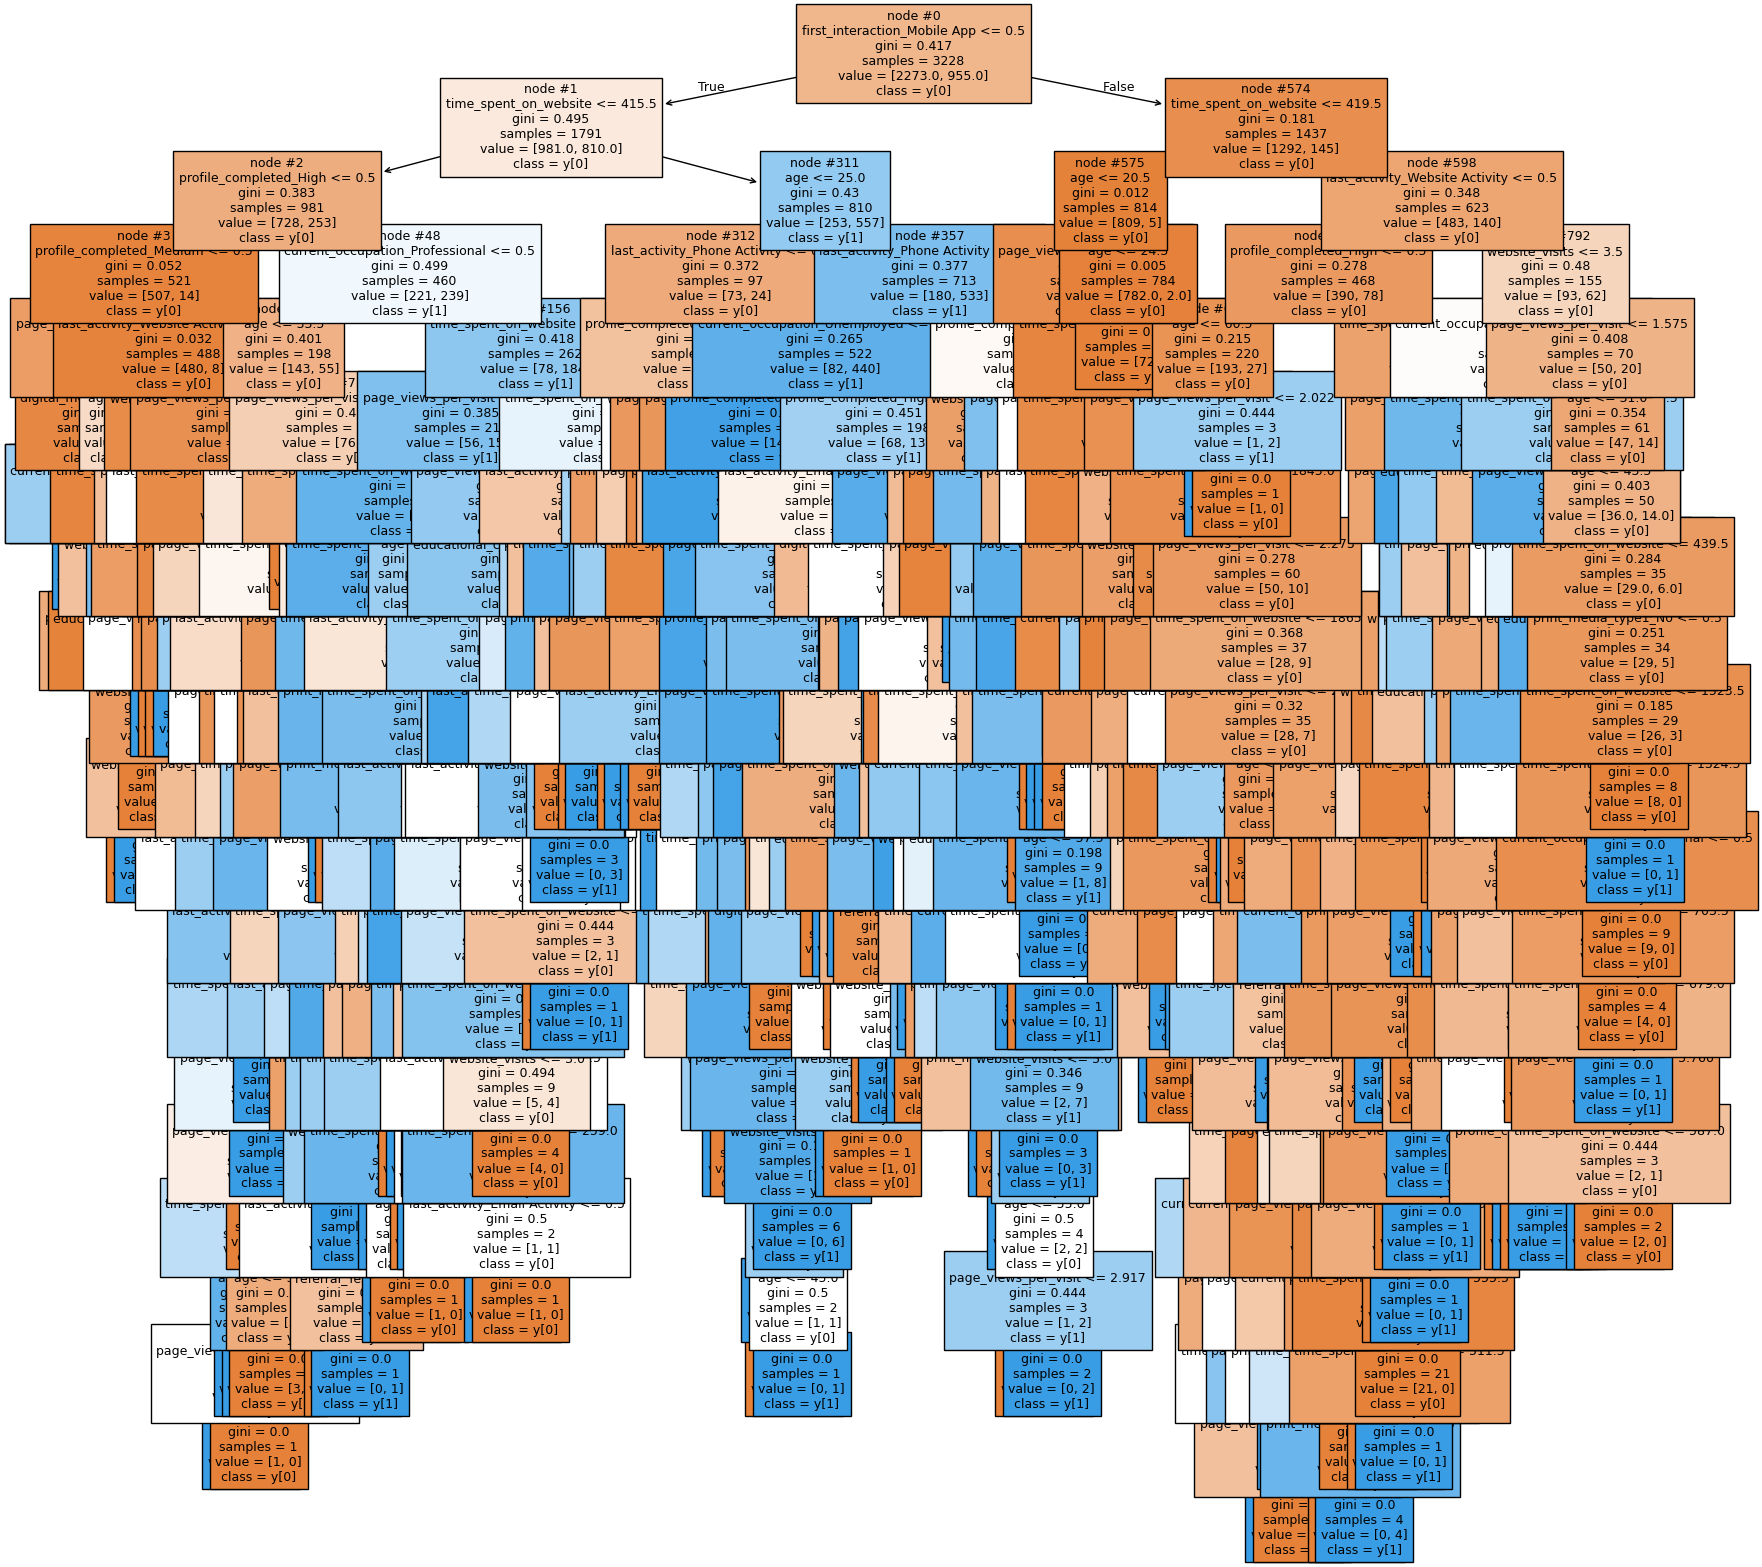

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#We nedd to prune the tree

In [ ]:
#prune the tree
d_tree_pruned = DecisionTreeClassifier(random_state=1, max_depth=3)
d_tree_pruned.fit(X_train, y_train)
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_pruned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       random_state=1)

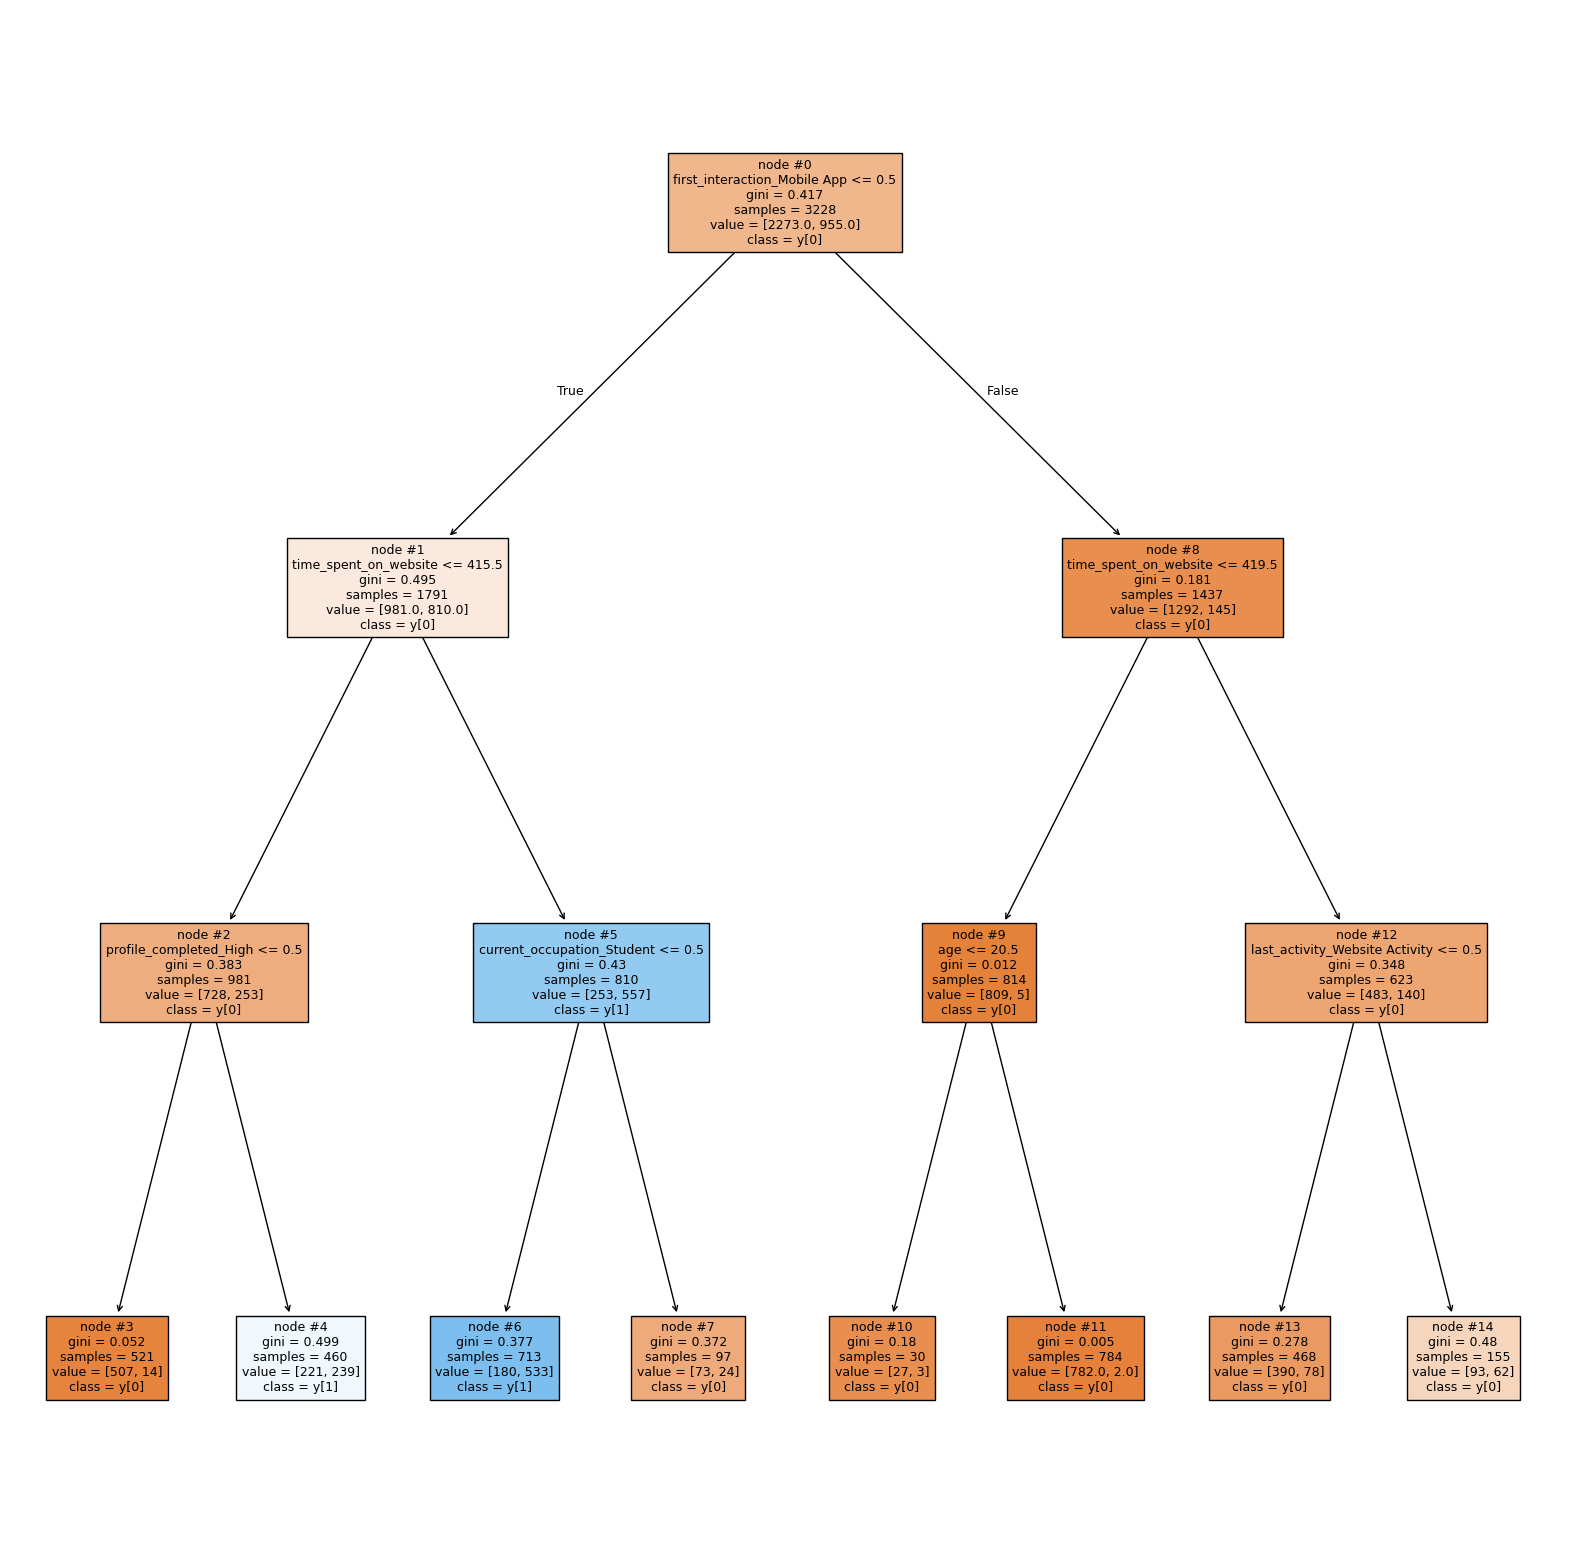

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_pruned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2273
           1       0.72      0.76      0.74       955

    accuracy                           0.84      3228
   macro avg       0.81      0.82      0.81      3228
weighted avg       0.85      0.84      0.84      3228



In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       962
           1       0.72      0.73      0.72       422

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



**Observations:**

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
print(classification_report(y_train, y_pred_train3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_fit = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_fit.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train4))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2273
           1       0.70      0.86      0.77       955

    accuracy                           0.85      3228
   macro avg       0.82      0.85      0.83      3228
weighted avg       0.86      0.85      0.85      3228



In [ ]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
print(classification_report(y_test, y_pred_test4))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       962
           1       0.71      0.85      0.77       422

    accuracy                           0.85      1384
   macro avg       0.82      0.85      0.83      1384
weighted avg       0.86      0.85      0.85      1384



**Observations:**

## Actionable Insights and Recommendations
1.   Target Younger Age Groups:
*   Observation: The younger age group shows less interest in converting to paid customers.
*  **Recommendation:** ExtraaLearn should develop targeted marketing campaigns aimed at younger demographics, focusing on content, incentives, or educational materials that resonate more with this group. Conduct research to understand their specific needs and preferences and adjust marketing strategies accordingly to increase engagement and conversion.
2.  Encourage Profile Completion:
*   Observation: Leads who completed their profiles at a high level are more likely to convert to paid customers.
* **Recommendation:** ExtraaLearn can implement personalized follow-ups or incentives for users with medium or low profile completion to encourage them to complete their profiles. This can include automated email reminders, offering rewards like discounts, or providing premium content access for completing profiles.
3.   Enhance First Interaction on the Mobile App:
*   Observation: The mobile app has a lower conversion rate compared to other channels.
*   **Recommendation:** Review the user experience (UX) of the mobile app's first interaction to identify potential friction points that may discourage conversions. Consider improvements such as simplifying navigation, enhancing the onboarding process, or providing interactive tutorials that guide users through the app's key features. Testing and optimization can improve conversion rates from this channel.


4.   Increase Engagement on Digital Media:


*  Observation: A large portion of leads have not interacted with digital media channels, such as social media or email campaigns.
*  **Recommendation:**  We should increase its presence on digital platforms by leveraging targeted ads, social media engagement, and email marketing campaigns to nurture leads and guide them through the conversion funnel. Tailored content for different stages of the user journey can also increase engagement.


5.  Utilize Referral Programs:


*   Observation: Referral rates are very low, indicating that leads arent being referred through word-of-mouth.
*   **Recommendation:** Implement a referral incentive program to encourage existing customers to refer friends or colleagues. Offering rewards, discounts, or bonuses for successful referrals can drive more organic leads and boost the conversion rate.


6.  Improve Print Media and Educational Channels Effectiveness:


*   Observation: Print media and educational channels have low engagement and conversion rates.
*  **Recommendation:**  Integrate cross-channel marketing strategies by combining print media or educational materials with digital follow-ups (e.g., QR codes directing to online content). This way, the prospects receive consistent and compelling messaging across both physical and digital platforms, encouraging further engagement.

By implementing these recommendations, we can focus on improving lead conversion rates across various channels, targeting key demographic groups, and optimizing the overall customer journey.











In [ ]:
!jupyter nbconvert -- to html Project2.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 585, in convert_notebooks
    raise ValueError(
ValueError: Please specify an output format with '--to <format>'.
The following formats are available: ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides', 'webpdf']
